In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import cv2
import os
import scipy.signal as sigl 
import scipy.ndimage as ndi
import scipy.fft as fft
from PIL import Image

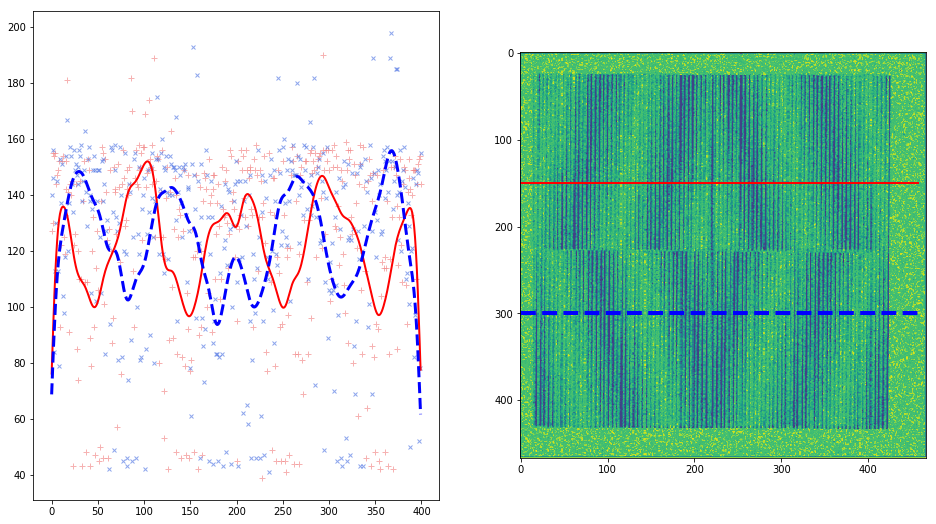

In [2]:
p1=4
p2=4.2
p_a=2*p1*p2/(p1+p2)
M=2*p_a/(p2-p1)
row1=150
row2=300
sigma=5.5
# read file
moire=cv2.imread('0.5_d.png',0)
shape=np.shape(moire)[0]
moire_new=moire[20:, 20:420]
# intensity of row

m_r1=moire_new[row1].astype(float)
m_r2=moire_new[row2].astype(float)

g_r1=ndi.gaussian_filter(m_r1,sigma,mode='constant',cval=0.0,truncate=4.0)
g_r2=ndi.gaussian_filter(m_r2,sigma,mode='constant',cval=0.0,truncate=4.0)
#find peak
peak_r1=sigl.find_peaks(g_r1,height=125,distance=20)[0]
peak_r2=sigl.find_peaks(g_r2,height=125,distance=20)[0]

# peak= [peak_r1[i] - peak_r2[i] for i in range(len(peak_r1))]
# print("peak= "+str(peak))
# print("peak_r1_red= "+str(peak_r1))
# print("peak_r2_blue= "+str(peak_r2))
# plot
plt.figure(figsize=(16,9))
plt.subplot(121)
r=np.arange(0,len(m_r1),1)
plt.plot(r,m_r1,'+', color='lightcoral',ms=6,alpha=0.6)
plt.plot(r,m_r2,'x', color='royalblue',ms=4,alpha=0.6)
plt.plot(r,g_r1,'-', color='red',lw=2)
plt.plot(r,g_r2,'--', color='blue',lw=3)
plt.subplot(122)
plt.imshow(moire, cmap='viridis')
plt.plot([0,shape-10], [row1,row1], '-', color='red',lw=2)
plt.plot([0,shape-10], [row2,row2], '--', color='blue',lw=4)


In [3]:
moire=cv2.imread('0.5_d.png',0)
shape=np.shape(moire)[0]
moire_new=moire[20:, 20:420]
# intensity of row
m_r1=moire_new[row1].astype(float)
m_r2=moire_new[row2].astype(float)
pix=8
lens=10
thre=6
def peak(y1):
    y1b=y1[:400]-y1[:400].mean()
    moire_fft=fft.fft(y1b)
    moire_fft2 = moire_fft.copy()
    moire_fft2[thre:-thre]=0
    moire_ifft = fft.ifft(moire_fft2)
    plt.plot(moire_ifft)
    peak_ifft1=sigl.find_peaks(moire_ifft,height=10,distance=50)[0]
    return(peak_ifft1,moire_ifft)
# hs=[]
for i in (m_r1,m_r2):
    hs.append(peak(i)[0])
 

NameError: name 'hs' is not defined